In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [7]:
df = pd.read_csv('../dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Glucose BloodPressure SkinThinkness Insulin BMI not be zero so replace with mean 
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [11]:
df['Outcome'].value_counts() # imblance dataset

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
# split data into dependent and independent variable
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

<Axes: >

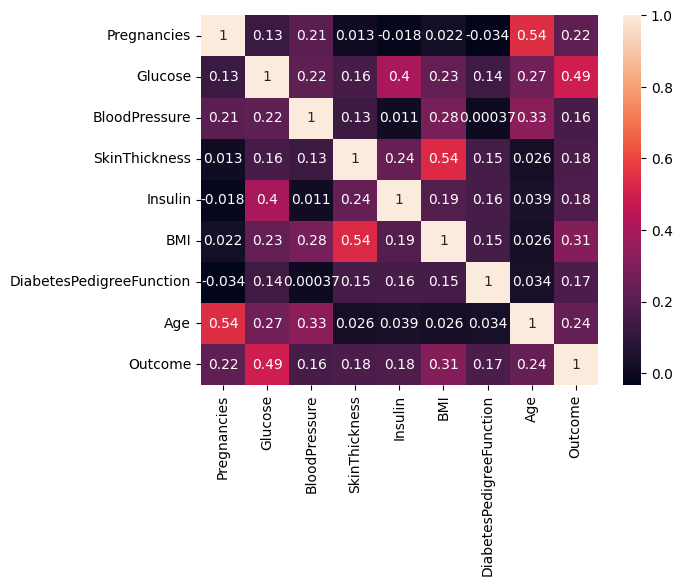

In [13]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

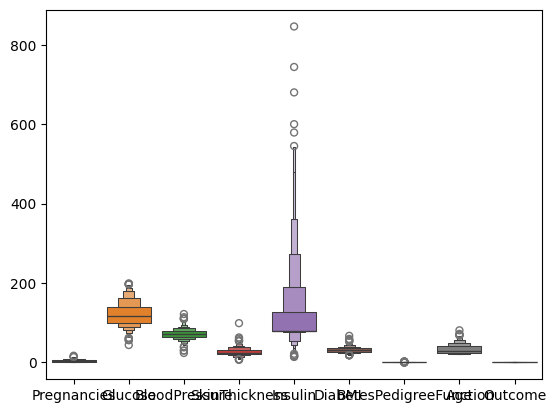

In [14]:
sns.boxenplot(df) # there is outliers so we scale down these values

In [15]:
# train test splite 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Model trainning
from sklearn.linear_model import LogisticRegression

In [20]:
classifier = LogisticRegression()

In [21]:
classifier.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
y_pred = classifier.predict(X_test_scaled)

In [23]:
# confusion matrix, accuracy test, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
      

[[88 11]
 [22 33]]
0.7857142857142857
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



# now we can see our accuracy is 78% now we use GridSearchCV for increase accuracy

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
parameters = {'penalty':('l1', 'l2', 'elasticnet', None),
              'C':[1,10],
              'solver':('lbfgs','liblinear','newton-cg', 'newton-cholesky', 'sag', 'saga')}
clf = GridSearchCV(classifier, param_grid=parameters,cv=5)

In [26]:
clf.fit(X_train_scaled, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [1, 10], 'penalty': ('l1', ...), 'solver': ('lbfgs', ...)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [28]:
clf.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [29]:
classifier = LogisticRegression(C=1, penalty='l2',solver= 'saga')

In [30]:
classifier.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [31]:
y_pred = classifier.predict(X_test_scaled)

In [32]:
# confusion matrix, accuracy test, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[88 11]
 [22 33]]
0.7857142857142857
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



# Decision Tree classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
def accuracy(no_of_leaf_nodes):
    decision_classifier = DecisionTreeClassifier(random_state=1,max_leaf_nodes=no_of_leaf_nodes)
    decision_classifier.fit(X_train, y_train)
    y_pred = decision_classifier.predict(X_test)
    return accuracy_score(y_test, y_pred)
    

In [35]:
# for i in range(10,20):
#     print(accuracy(i) , i)
best_no_of_leaf = 13

In [36]:
decision_classifier = DecisionTreeClassifier(random_state=1,max_leaf_nodes=best_no_of_leaf)
decision_classifier.fit(X_train, y_train)
y_pred = decision_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
    

0.8246753246753247


In [37]:
import pickle

pickle.dump(scaler, open("scaler.pkl","wb"))
pickle.dump(decision_classifier, open("classifier.pkl","wb"))


[Text(0.5, 0.9285714285714286, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.7857142857142857, 'x[7] <= 28.5\ngini = 0.311\nsamples = 389\nvalue = [314, 75]'),
 Text(0.375, 0.8571428571428572, 'True  '),
 Text(0.125, 0.6428571428571429, 'x[5] <= 45.4\ngini = 0.167\nsamples = 217\nvalue = [197, 20]'),
 Text(0.0625, 0.5, 'gini = 0.147\nsamples = 213\nvalue = [196, 17]'),
 Text(0.1875, 0.5, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.375, 0.6428571428571429, 'x[5] <= 26.25\ngini = 0.435\nsamples = 172\nvalue = [117, 55]'),
 Text(0.3125, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.4375, 0.5, 'x[1] <= 99.5\ngini = 0.478\nsamples = 139\nvalue = [84, 55]'),
 Text(0.375, 0.35714285714285715, 'gini = 0.234\nsamples = 37\nvalue = [32, 5]'),
 Text(0.5, 0.35714285714285715, 'x[6] <= 0.2\ngini = 0.5\nsamples = 102\nvalue = [52, 50]'),
 Text(0.4375, 0.21428571428571427, 'gini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.5625, 0.2142857

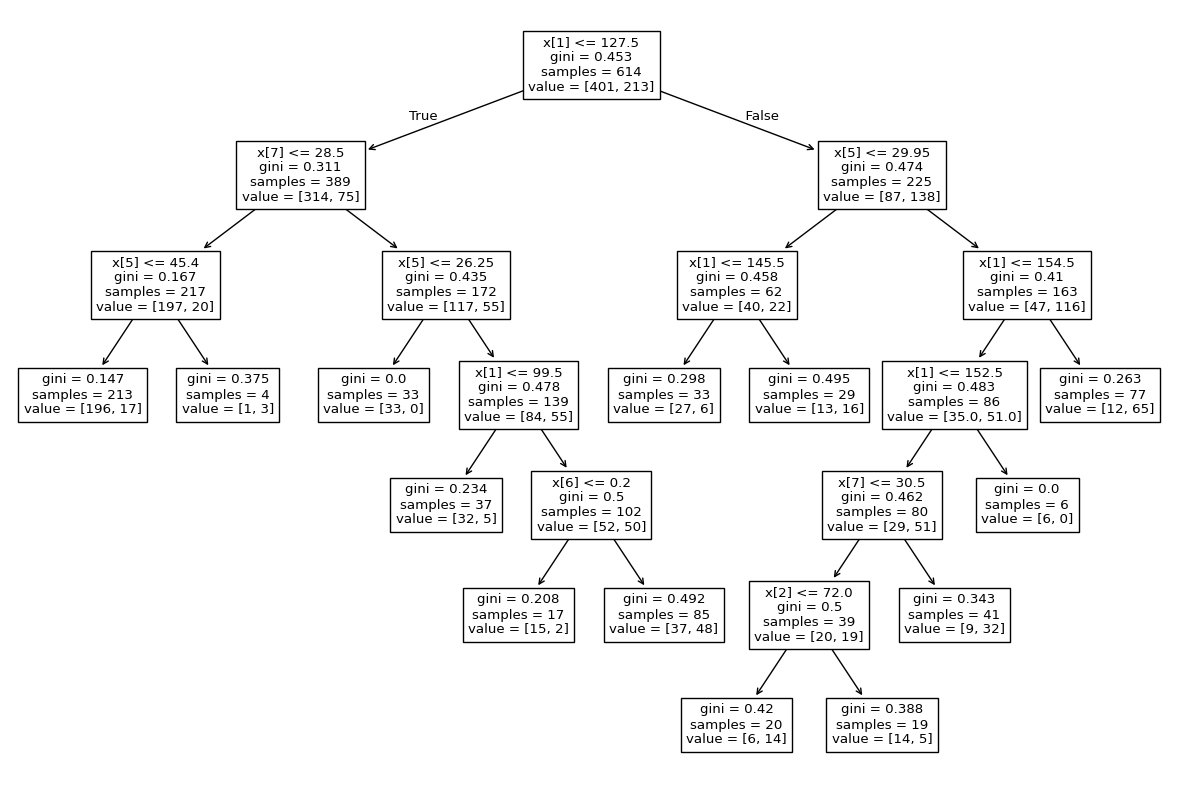

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

tree.plot_tree(decision_classifier)


In [39]:
# confusion matrix, accuracy test, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[81 18]
 [ 9 46]]
0.8246753246753247
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        99
           1       0.72      0.84      0.77        55

    accuracy                           0.82       154
   macro avg       0.81      0.83      0.82       154
weighted avg       0.84      0.82      0.83       154



In [41]:
import pickle

pickle.dump(scaler, open("scaler.pkl","wb"))
pickle.dump(classifier, open("classifier.pkl","wb"))


# SVC

In [42]:
from sklearn.svm import SVC

svc_classifier = SVC(random_state=1,)

In [43]:
svc_classifier.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:
y_pred = svc_classifier.predict(X_test)

In [ ]:
# confusion matrix, accuracy test, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[94  5]
 [27 28]]
0.7922077922077922
              precision    recall  f1-score   support

           0       0.78      0.95      0.85        99
           1       0.85      0.51      0.64        55

    accuracy                           0.79       154
   macro avg       0.81      0.73      0.75       154
weighted avg       0.80      0.79      0.78       154



# GaussianNB

In [45]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()

In [46]:
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [47]:
y_pred = classifier.predict(X_test)

In [48]:
# confusion matrix, accuracy test, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[91  8]
 [38 17]]
0.7012987012987013
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        99
           1       0.68      0.31      0.42        55

    accuracy                           0.70       154
   macro avg       0.69      0.61      0.61       154
weighted avg       0.70      0.70      0.66       154

